In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

loan_df= pd.read_csv("loan.csv", encoding = "utf-8", low_memory=False)

In [144]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [145]:
null_series=loan_df.isnull().sum().apply(lambda x:x>=25000) #Identify null columns with more than x null values 
null_series=null_series[null_series.values]
null_series.count()

57

In [146]:
loan_df=loan_df.drop(null_series.index, axis=1)
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37259 non-null object
emp_length                    39717 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

In [147]:
loan_status_total=loan_df.groupby('loan_status')['id'].count().sort_values(ascending=False)
print(loan_status_total)

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: id, dtype: int64


In [148]:
# analysis is to understand the defaulter, the current status can be removed from the data set
loan_df=loan_df.drop(loan_df[loan_df.loan_status=="Current"].index)

In [149]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 54 columns):
id                            38577 non-null int64
member_id                     38577 non-null int64
loan_amnt                     38577 non-null int64
funded_amnt                   38577 non-null int64
funded_amnt_inv               38577 non-null float64
term                          38577 non-null object
int_rate                      38577 non-null object
installment                   38577 non-null float64
grade                         38577 non-null object
sub_grade                     38577 non-null object
emp_title                     36192 non-null object
emp_length                    38577 non-null object
home_ownership                38577 non-null object
annual_inc                    38577 non-null float64
verification_status           38577 non-null object
issue_d                       38577 non-null object
loan_status                   38577 non-null object
pymnt_pl

In [150]:
uniques = loan_df.apply(lambda x: x.nunique())
loan_df=loan_df.drop(uniques[uniques==1].index, axis=1)
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 43 columns):
id                         38577 non-null int64
member_id                  38577 non-null int64
loan_amnt                  38577 non-null int64
funded_amnt                38577 non-null int64
funded_amnt_inv            38577 non-null float64
term                       38577 non-null object
int_rate                   38577 non-null object
installment                38577 non-null float64
grade                      38577 non-null object
sub_grade                  38577 non-null object
emp_title                  36192 non-null object
emp_length                 38577 non-null object
home_ownership             38577 non-null object
annual_inc                 38577 non-null float64
verification_status        38577 non-null object
issue_d                    38577 non-null object
loan_status                38577 non-null object
url                        38577 non-null object
desc      

In [151]:
#Since we are not analysing whether a current user will default or not. We donot need payment related information. We can use loan_status to identify a user as defaulter/not. We can drop columns 
#total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_d,last_pymnt_amnt and last_credit_pull_d
loan_df=loan_df.drop(['total_pymnt','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d'],axis=1)
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 35 columns):
id                         38577 non-null int64
member_id                  38577 non-null int64
loan_amnt                  38577 non-null int64
funded_amnt                38577 non-null int64
funded_amnt_inv            38577 non-null float64
term                       38577 non-null object
int_rate                   38577 non-null object
installment                38577 non-null float64
grade                      38577 non-null object
sub_grade                  38577 non-null object
emp_title                  36192 non-null object
emp_length                 38577 non-null object
home_ownership             38577 non-null object
annual_inc                 38577 non-null float64
verification_status        38577 non-null object
issue_d                    38577 non-null object
loan_status                38577 non-null object
url                        38577 non-null object
desc      

In [152]:
loan_df.isnull().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   2385
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
url                            0
desc                       12526
purpose                        0
title                         10
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util

In [153]:
# Description ,employment title and public record of bankruptices does not make any correlation to defaulting of payments. removing those records
loan_df=loan_df.drop(['emp_title','desc','pub_rec_bankruptcies','title','url'],axis=1)
loan_df.isnull().sum()

id                          0
member_id                   0
loan_amnt                   0
funded_amnt                 0
funded_amnt_inv             0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_length                  0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
zip_code                    0
addr_state                  0
dti                         0
delinq_2yrs                 0
earliest_cr_line            0
inq_last_6mths              0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                 50
total_acc                   0
total_pymnt_inv             0
collection_recovery_fee     0
dtype: int64

In [154]:
# Total credit revolving balance and Revolving line utilization rate does not make any correlation to defaulting of payments. removing those records
loan_df=loan_df.drop(['revol_bal','revol_util','collection_recovery_fee','total_pymnt_inv'],axis=1)
loan_df.isnull().sum()

id                     0
member_id              0
loan_amnt              0
funded_amnt            0
funded_amnt_inv        0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
zip_code               0
addr_state             0
dti                    0
delinq_2yrs            0
earliest_cr_line       0
inq_last_6mths         0
open_acc               0
pub_rec                0
total_acc              0
dtype: int64

In [155]:
import re
# Function to prune year String

def getYear(yearString):
    if '<' in yearString:
        return str(0)
    elif '+' in yearString:
        return str(10)
    elif 'year' in yearString:
        print(yearString)
        return str(re.findall('\d+', yearString)[0])
vectorisedGetYear = np.vectorize(getYear, otypes=[np.ndarray])  

In [156]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 26 columns):
id                     38577 non-null int64
member_id              38577 non-null int64
loan_amnt              38577 non-null int64
funded_amnt            38577 non-null int64
funded_amnt_inv        38577 non-null float64
term                   38577 non-null object
int_rate               38577 non-null object
installment            38577 non-null float64
grade                  38577 non-null object
sub_grade              38577 non-null object
emp_length             38577 non-null object
home_ownership         38577 non-null object
annual_inc             38577 non-null float64
verification_status    38577 non-null object
issue_d                38577 non-null object
loan_status            38577 non-null object
purpose                38577 non-null object
zip_code               38577 non-null object
addr_state             38577 non-null object
dti                    38577 non-null

In [157]:
loan_df.head(20)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,total_acc
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65%,162.87,B,B2,...,credit_card,860xx,AZ,27.65,0,Jan-85,1,3,0,9
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27%,59.83,C,C4,...,car,309xx,GA,1.00,0,Apr-99,5,3,0,4
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96%,84.33,C,C5,...,small_business,606xx,IL,8.72,0,Nov-01,2,2,0,10
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49%,339.31,C,C1,...,other,917xx,CA,20.00,0,Feb-96,1,10,0,37
5,1075269,1311441,5000,5000,5000.00000,36 months,7.90%,156.46,A,A4,...,wedding,852xx,AZ,11.20,0,Nov-04,3,9,0,12
6,1069639,1304742,7000,7000,7000.00000,60 months,15.96%,170.08,C,C5,...,debt_consolidation,280xx,NC,23.51,0,Jul-05,1,7,0,11
7,1072053,1288686,3000,3000,3000.00000,36 months,18.64%,109.43,E,E1,...,car,900xx,CA,5.35,0,Jan-07,2,4,0,4
8,1071795,1306957,5600,5600,5600.00000,60 months,21.28%,152.39,F,F2,...,small_business,958xx,CA,5.55,0,Apr-04,2,11,0,13
9,1071570,1306721,5375,5375,5350.00000,60 months,12.69%,121.45,B,B5,...,other,774xx,TX,18.08,0,Sep-04,0,2,0,3
10,1070078,1305201,6500,6500,6500.00000,60 months,14.65%,153.45,C,C3,...,debt_consolidation,853xx,AZ,16.12,0,Jan-98,2,14,0,23


In [158]:
#Standardize the inputs for term, int_rate, installment & employment length
loan_df['installment']=round(loan_df['installment'],0)
loan_df['int_rate']=loan_df['int_rate'].apply(lambda x:x[:-1])

In [159]:
loan_df['emp_length'].unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years', '4 years',
       '5 years', '1 year', '6 years', '2 years', '7 years', 'n/a'], dtype=object)

In [160]:
loan_df['int_rate']=loan_df['int_rate'].apply(lambda x:float(x))

In [161]:
loan_df=loan_df.drop(loan_df[loan_df.emp_length=='n/a'].index)

In [162]:
loan_df['emp_length'].unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years', '4 years',
       '5 years', '1 year', '6 years', '2 years', '7 years'], dtype=object)

In [163]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37544 entries, 0 to 39716
Data columns (total 26 columns):
id                     37544 non-null int64
member_id              37544 non-null int64
loan_amnt              37544 non-null int64
funded_amnt            37544 non-null int64
funded_amnt_inv        37544 non-null float64
term                   37544 non-null object
int_rate               37544 non-null float64
installment            37544 non-null float64
grade                  37544 non-null object
sub_grade              37544 non-null object
emp_length             37544 non-null object
home_ownership         37544 non-null object
annual_inc             37544 non-null float64
verification_status    37544 non-null object
issue_d                37544 non-null object
loan_status            37544 non-null object
purpose                37544 non-null object
zip_code               37544 non-null object
addr_state             37544 non-null object
dti                    37544 non-nul

In [164]:
installment_wise_total = loan_df.groupby('loan_status')['installment'].count().sort_values(ascending=True)
installment_wise_total

loan_status
Charged Off     5399
Fully Paid     32145
Name: installment, dtype: int64

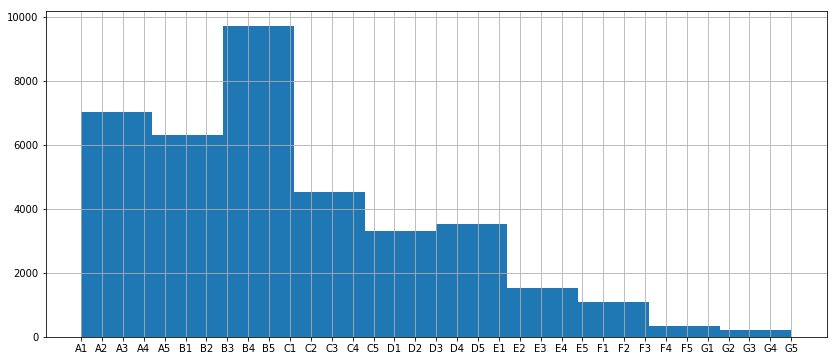

In [165]:
#uni-variate analysis on the unordered categorical values on the sub-grade
p=loan_df['sub_grade'].hist(figsize=[14,6])
plt.show()

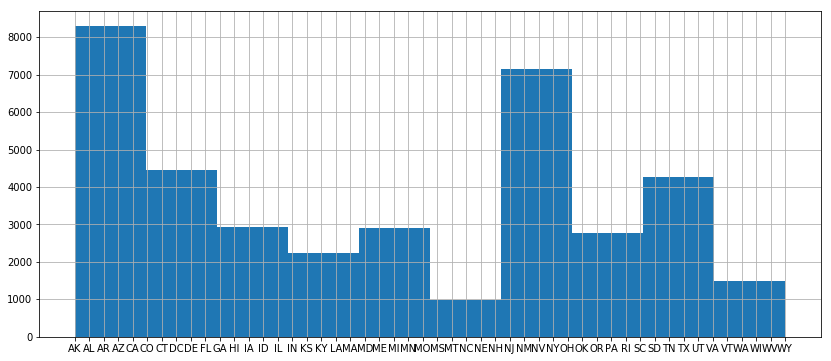

In [166]:
#uni-variate analysis on the unordered categorical values on the addr_state
p=loan_df['addr_state'].hist(figsize=[14,6])
plt.show()

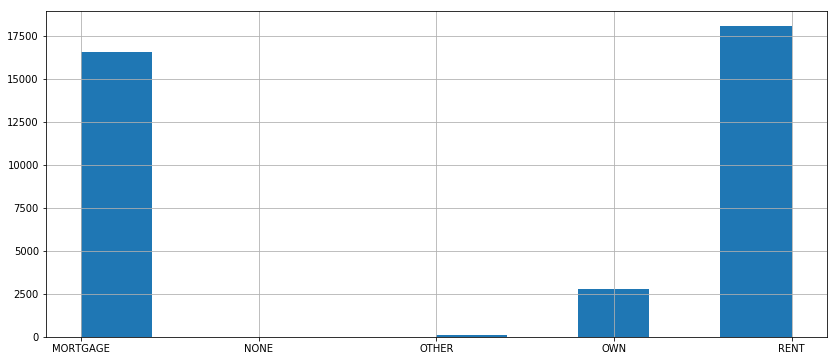

In [167]:
#uni-variate analysis on the unordered categorical values on the home ownership
p=loan_df['home_ownership'].hist(figsize=[14,6])
plt.show()

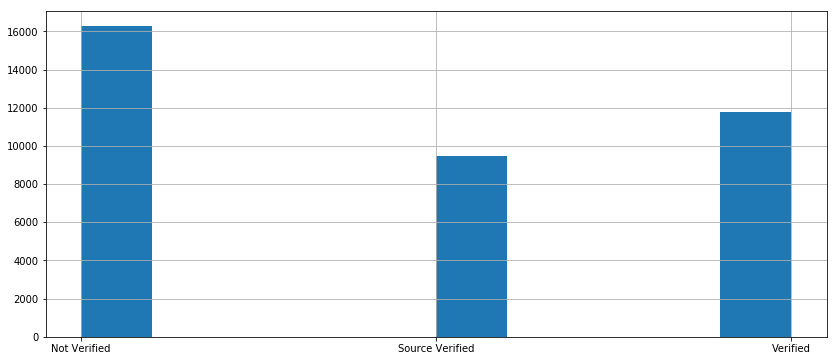

In [168]:
p=loan_df['verification_status'].hist(figsize=[14,6])
plt.show()

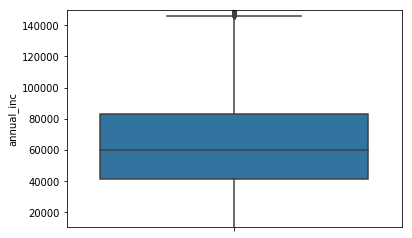

In [169]:
sns.boxplot(y=loan_df['annual_inc'])
#plt.yscale('log')
plt.ylim(10000, 150000)
plt.show()

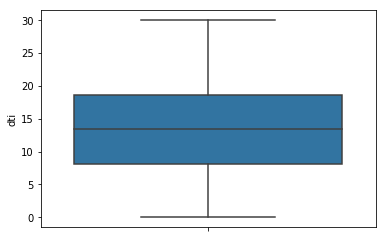

In [170]:
sns.boxplot(y=loan_df['dti'])
#plt.yscale('log')
#plt.ylim(5, 50)
plt.show()

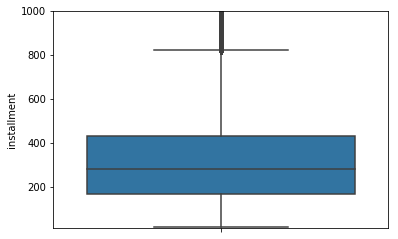

In [171]:
sns.boxplot(y=loan_df['installment'])
#plt.yscale('log')
plt.ylim(10, 1000)
plt.show()

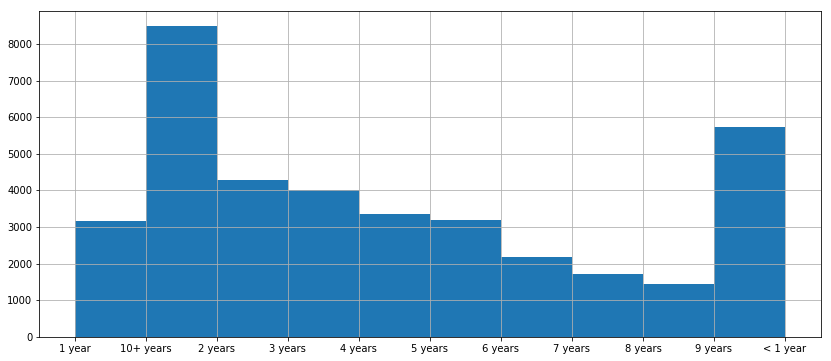

In [172]:
p=loan_df['emp_length'].hist(figsize=[14,6])
plt.show()

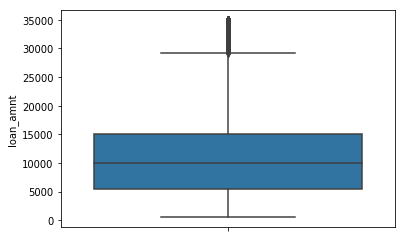

In [173]:
sns.boxplot(y=loan_df['loan_amnt'])
#plt.yscale('log')
#plt.ylim(5, 50)
plt.show()

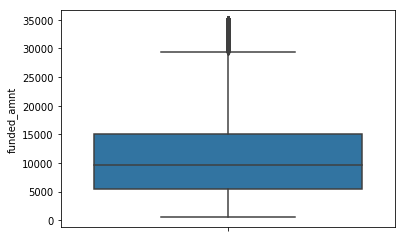

In [174]:
sns.boxplot(y=loan_df['funded_amnt'])
#plt.yscale('log')
#plt.ylim(5, 50)
plt.show()

In [175]:
#uni-variate analysis on the on the continuous variable 
def plot_graph(df, param,lower,upper):
    fully_paid_df=loan_df[loan_df.loan_status == 'Fully Paid']
    default_paid_df=loan_df[loan_df.loan_status == 'Charged Off']
    
    plt.figure(figsize=(20, 10)) 
    plt.subplot(1,2,1)
    sns.boxplot(y=default_paid_df[param])
    plt.title(param +' distribution for Default ',fontsize=20)
    plt.ylim(lower, upper)
    
    plt.subplot(1,2,2)
    sns.boxplot(y=fully_paid_df[param])
    plt.title(param +' distribution for Fully Paid ',fontsize=20)
    plt.ylim(lower, upper)
    plt.show()

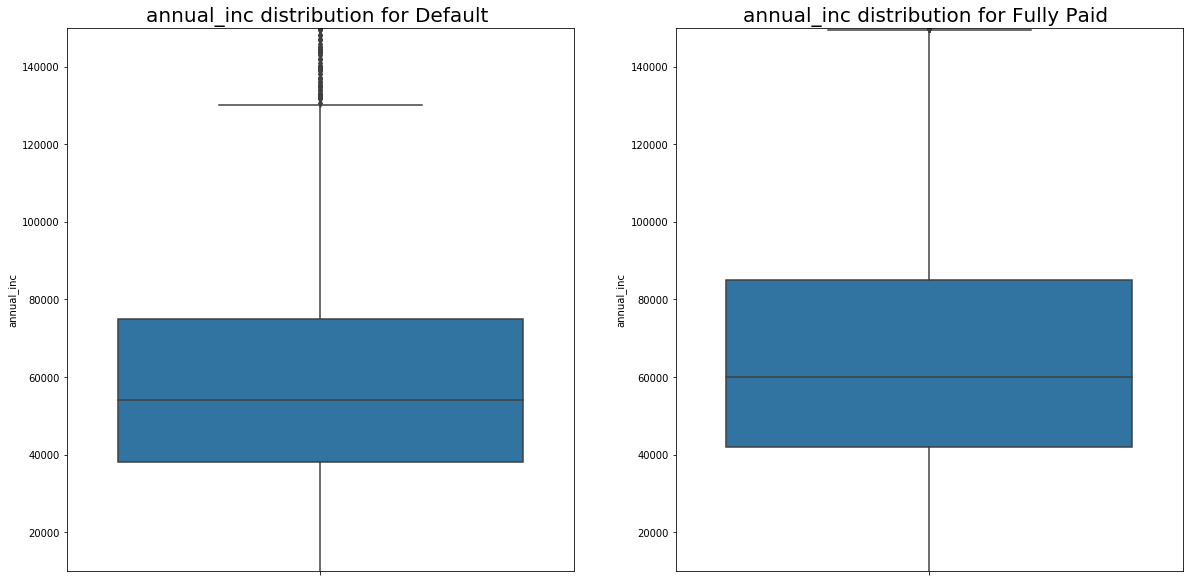

In [176]:
plot_graph(loan_df,'annual_inc',10000,150000)

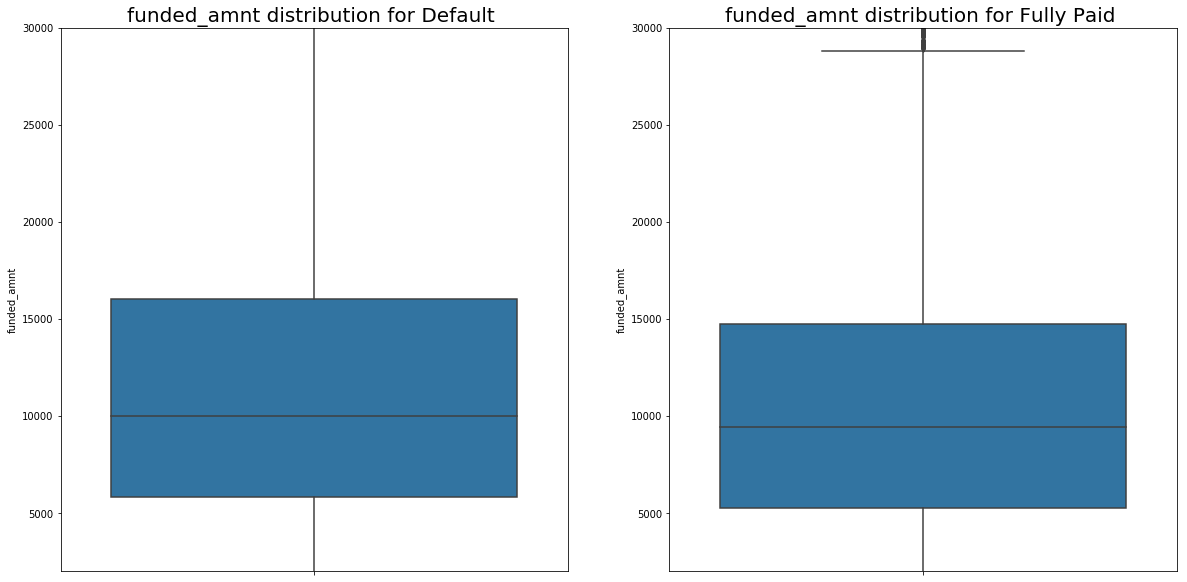

In [177]:
plot_graph(loan_df,'funded_amnt',2000,30000)

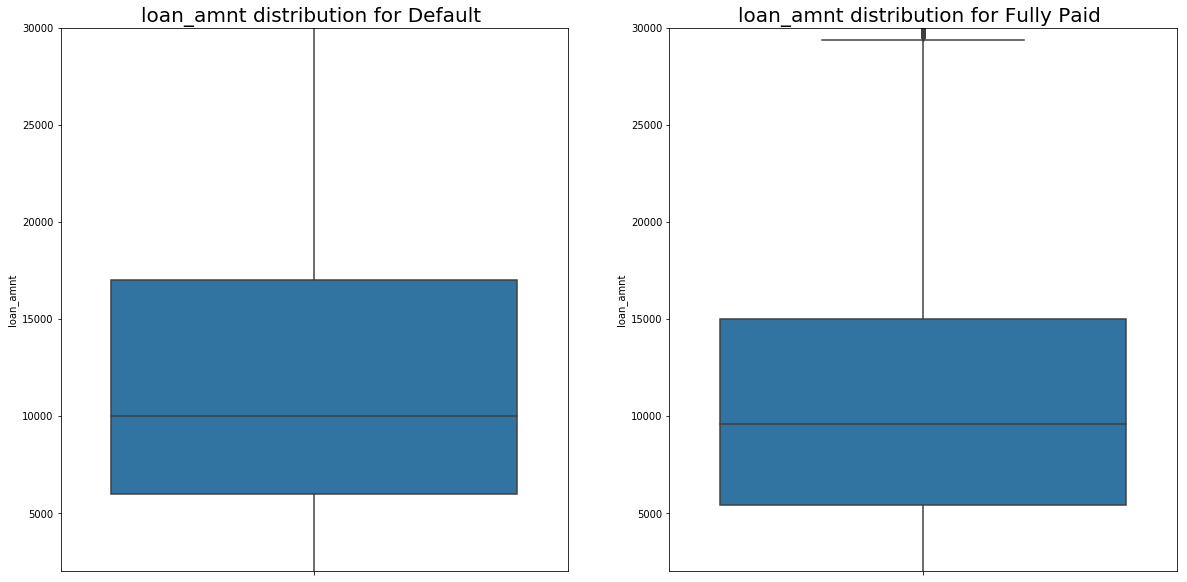

In [178]:
plot_graph(loan_df,'loan_amnt',2000,30000)

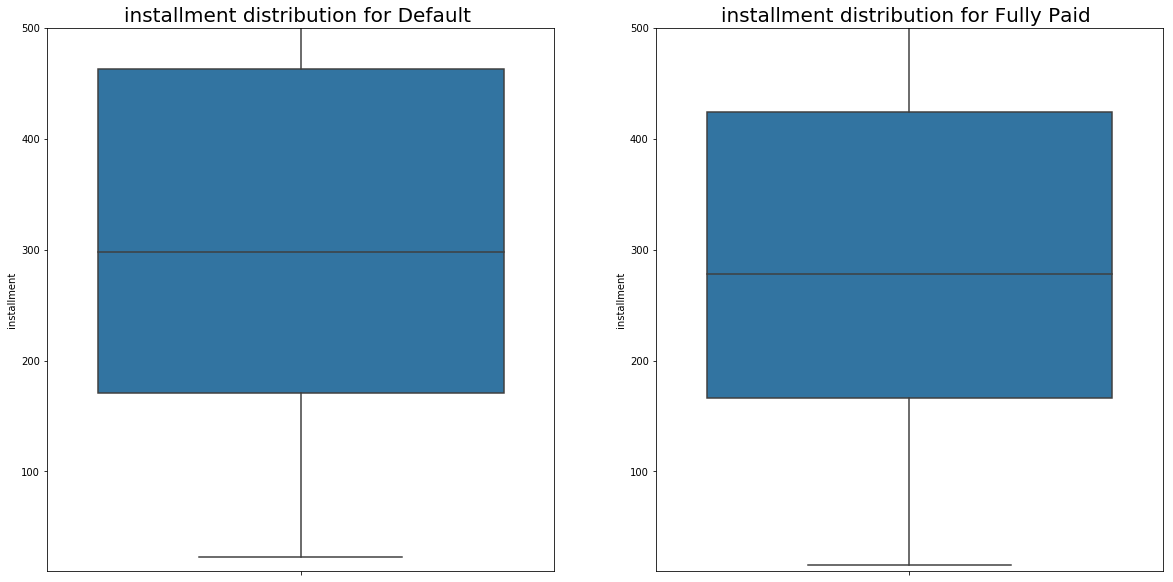

In [179]:
plot_graph(loan_df,'installment',10,500)

In [180]:
fully_paid_df=loan_df[loan_df.loan_status == 'Fully Paid']
default_paid_df=loan_df[loan_df.loan_status  == 'Charged Off']

In [238]:
def plot_pie_chart(col_name,df,title):
    label_list=df.index
    colors = ['green','orange','red','yellow','purple']
    plt.figure(1, figsize=(8,6))
    plt.axis('equal')
    plt.pie(df,labels=label_list,autopct="%1.1f%%",colors=colors,startangle=90) 
    plt.title(title) 
    plt.show()

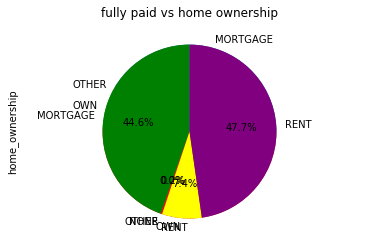

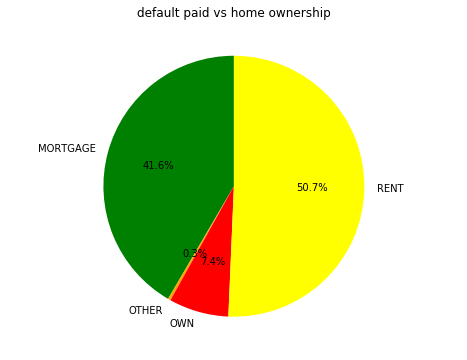

In [241]:
df2 = fully_paid_df.home_ownership.groupby(loan_df.home_ownership).count()
plot_pie_chart("home_ownership",df2,"fully paid vs home ownership")

df2 = default_paid_df.home_ownership.groupby(loan_df.home_ownership).count()
plot_pie_chart("home_ownership",df2,"default paid vs home ownership")

In [182]:
loan_df.groupby(['loan_status', 'home_ownership']).id.agg(['count'])
#create a pie-chart with the percentage to understand the distribution
#ToDO

count
loan_status home_ownership       
Charged Off MORTGAGE         2245
            OTHER              18
            OWN               400
            RENT             2736
Fully Paid  MORTGAGE        14350
            NONE                3
            OTHER              80
            OWN              2370
            RENT            15342

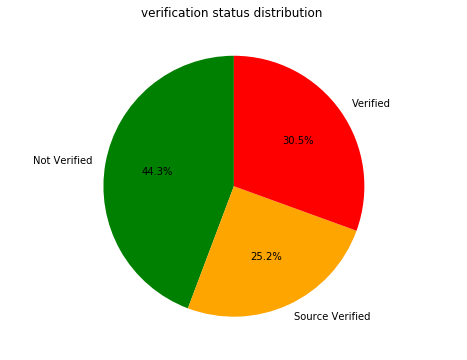

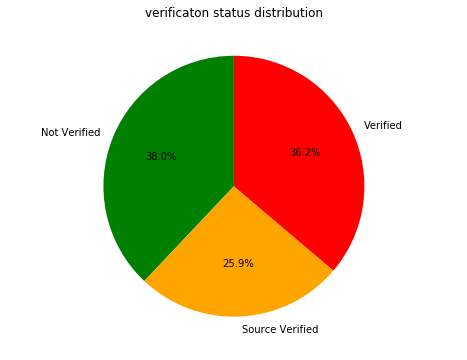

In [247]:
df2 = fully_paid_df.verification_status.groupby(loan_df.verification_status).count()
plot_pie_chart("home_ownership",df2,"verification status distribution on fully paid ")

df2 = default_paid_df.verification_status.groupby(loan_df.verification_status).count()
plot_pie_chart("home_ownership",df2,"verificaton status distribution on default")

In [183]:
loan_df.groupby(['loan_status', 'verification_status']).id.agg(['count'])
#create a pie-chart with the percentage to understand the distribution
#ToDO

count
loan_status verification_status       
Charged Off Not Verified          2049
            Source Verified       1396
            Verified              1954
Fully Paid  Not Verified         14229
            Source Verified       8098
            Verified              9818

In [184]:
loan_df.groupby(['loan_status', 'addr_state']).id.agg(['count'])
#create a pie-chart with the percentage to understand the distribution
#ToDO

count
loan_status addr_state       
Charged Off AK             15
            AL             51
            AR             26
            AZ            114
            CA           1074
            CO             91
            CT             89
            DC             15
            DE             12
            FL            482
            GA            209
            HI             28
            ID              1
            IL            194
            KS             26
            KY             45
            LA             52
            MA            150
            MD            158
            MI             97
            MN             79
            MO            106
            MS              2
            MT             10
            NC            110
            NE              3
            NH             23
            NJ            276
            NM             29
            NV            101
...                       ...
Fully Paid  MD            847
            ME              3
            MI            574
            MN            504
            MO            541
            MS             17
            MT             67
            NC            616
            NE              2
            NH            134
            NJ           1492
            NM            150
            NV            363
            NY           3123
            OH           1000
            OK            242
            OR            352
            PA           1267
            RI            167
            SC            387
            SD             50
            TN             15
            TX           2296
            UT            208
            VA           1167
            VT             47
            WA            665
            WI            367
            WV            143
            WY             73

[97 rows x 1 columns]

In [185]:
loan_df.groupby(['loan_status', 'emp_length']).id.agg(['count'])
#create a pie-chart with the percentage to understand the distribution
#ToDO

count
loan_status emp_length       
Charged Off 1 year        456
            10+ years    1331
            2 years       567
            3 years       555
            4 years       462
            5 years       458
            6 years       307
            7 years       263
            8 years       203
            9 years       158
            < 1 year      639
Fully Paid  1 year       2713
            10+ years    7157
            2 years      3724
            3 years      3457
            4 years      2880
            5 years      2736
            6 years      1861
            7 years      1448
            8 years      1232
            9 years      1068
            < 1 year     3869

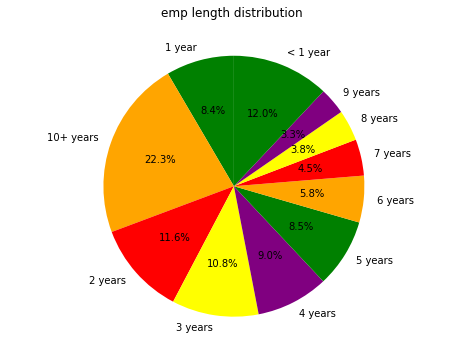

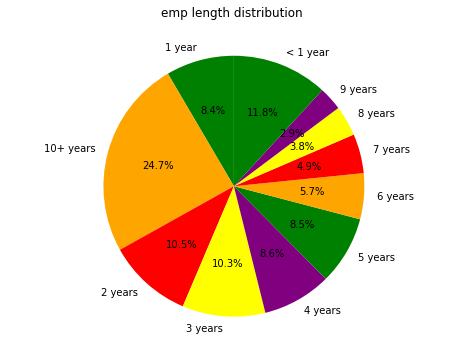

In [248]:
df2 = fully_paid_df.emp_length.groupby(loan_df.emp_length).count()
plot_pie_chart("emp_length",df2,"fully paid emp length distribution ")

df2 = default_paid_df.emp_length.groupby(loan_df.emp_length).count()
plot_pie_chart("emp_length",df2,"default emp length distribution ")

In [186]:
rate_wise_total = loan_df.groupby('loan_status')['dti'].median().sort_values(ascending=True)
rate_wise_total
#create a pie-chart with the percentage to understand the distribution
#ToDO

loan_status
Fully Paid     13.21
Charged Off    14.29
Name: dti, dtype: float64

In [187]:
loan_df['charged_off'] = 0 #initialize with 0 for Charged Off
loan_df['fully_paid']  = 0 #initialize with 0 for fully paid
loan_df.loc[loan_df.loan_status =='Charged Off','charged_off']=1
loan_df.loc[loan_df.loan_status =='Fully Paid','fully_paid']=1

In [188]:
def plot_for_seg_univariate(column_name,df_segment):
    plt.suptitle('Segmented Univariate Analysis (' + column_name + ')', fontsize=24)
    plt.rc("font", size=10)
    plt.figure(figsize=(20, 10))
    sns.barplot(x=df_segment.index, y='debt_default_index', data=df_segment)
    plt.title('Debt Default Index vs ' + column_name)
    plt.xlabel(column_name,rotation=0, fontsize=20, labelpad=20)
    plt.xticks(rotation=45,fontsize=10)
    plt.ylabel('Debt Default Index',rotation=90, fontsize=20, labelpad=20)
    plt.show()
    return

In [196]:
def debt_default_by_segment(column ,showsize=10):
        loan_df_column_status=loan_df.pivot_table(values=['charged_off','fully_paid'],index=[column],aggfunc=('sum'))
        loan_df_column_status['percent_charged_off']= round(100*loan_df_column_status.charged_off/(loan_df_column_status.charged_off + loan_df_column_status.fully_paid),2)
        loan_df_column_status['debt_default_index']= loan_df_column_status.charged_off/(loan_df_column_status.charged_off+loan_df_column_status.fully_paid)
        loan_df_column_status.head(showsize)
        return loan_df_column_status

In [190]:
def debt_default_by_segment_numbins(column ,new_bin_col_name,binval,showsize=10):
        #bins = np.linspace(loan_df[column].min(), loan_df[column].max(), binval)
        loan_df[new_bin_col_name] = pd.cut(loan_df[column], binval)
        loan_df_column_status=loan_df.pivot_table(values=['charged_off','fully_paid'],index=[new_bin_col_name],aggfunc=('sum'))
        loan_df_column_status['percent_charged_off']= round(100*loan_df_column_status.charged_off/(loan_df_column_status.charged_off + loan_df_column_status.fully_paid),2)
        loan_df_column_status['debt_default_index']= loan_df_column_status.charged_off/(loan_df_column_status.charged_off+loan_df_column_status.fully_paid)
        loan_df_column_status.head(showsize)
        return loan_df_column_status

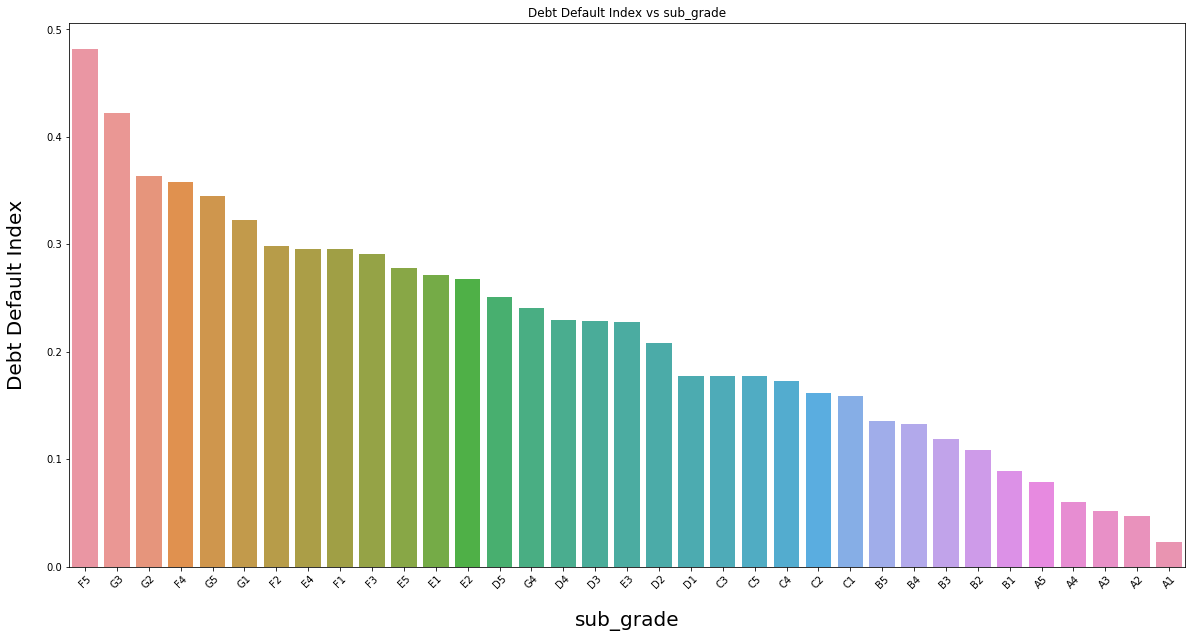

In [191]:
#Derive loan grade v/s Debt defaulters index table based on the grade
df2=debt_default_by_segment('sub_grade').sort_values(by='percent_charged_off',ascending=False)
plot_for_seg_univariate('sub_grade',df2)

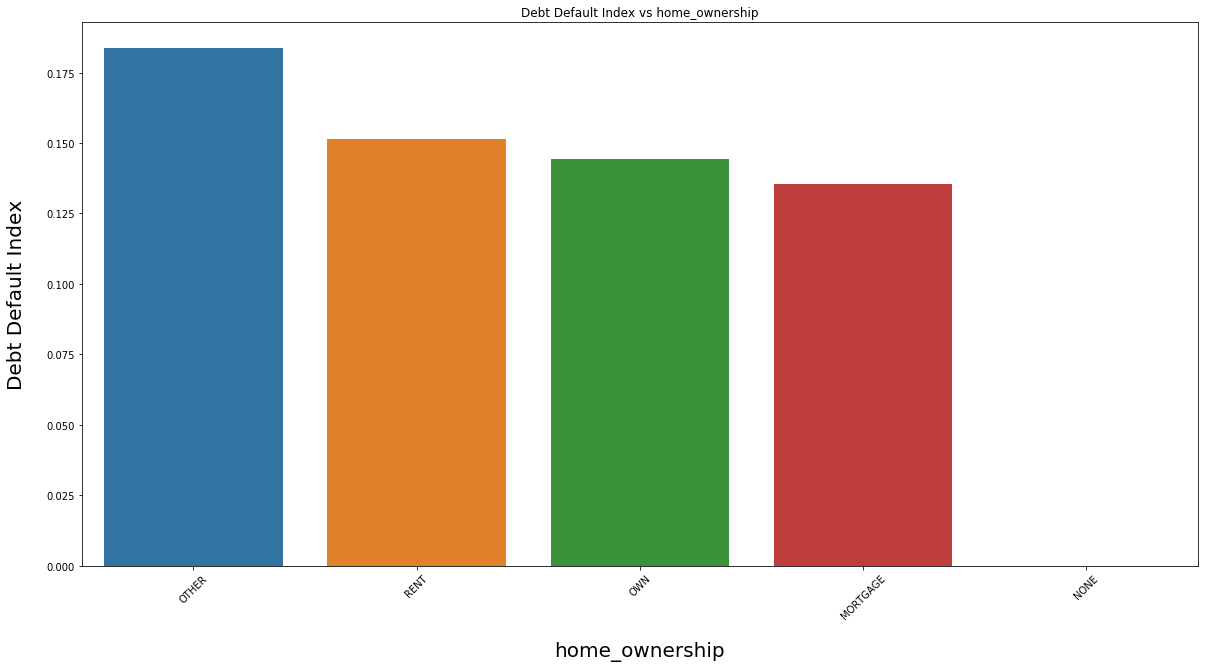

In [192]:
df2=debt_default_by_segment('home_ownership').sort_values(by='percent_charged_off',ascending=False)
plot_for_seg_univariate('home_ownership',df2)

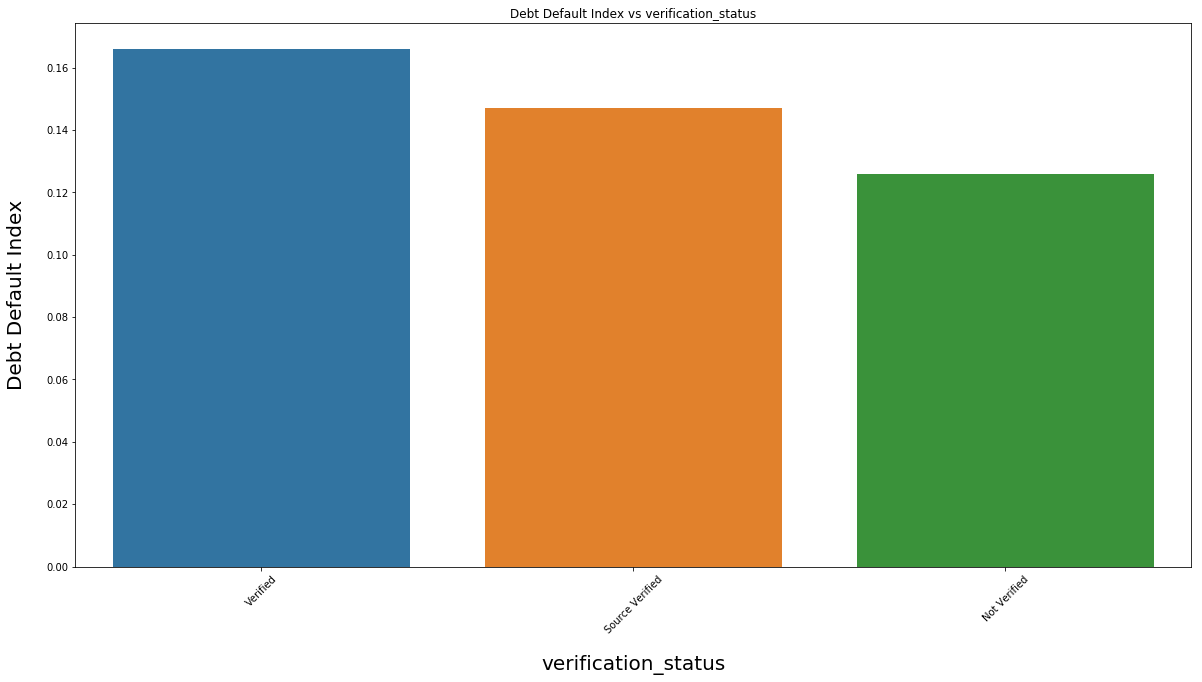

In [193]:
df2=debt_default_by_segment('verification_status').sort_values(by='percent_charged_off',ascending=False)
plot_for_seg_univariate('verification_status',df2)

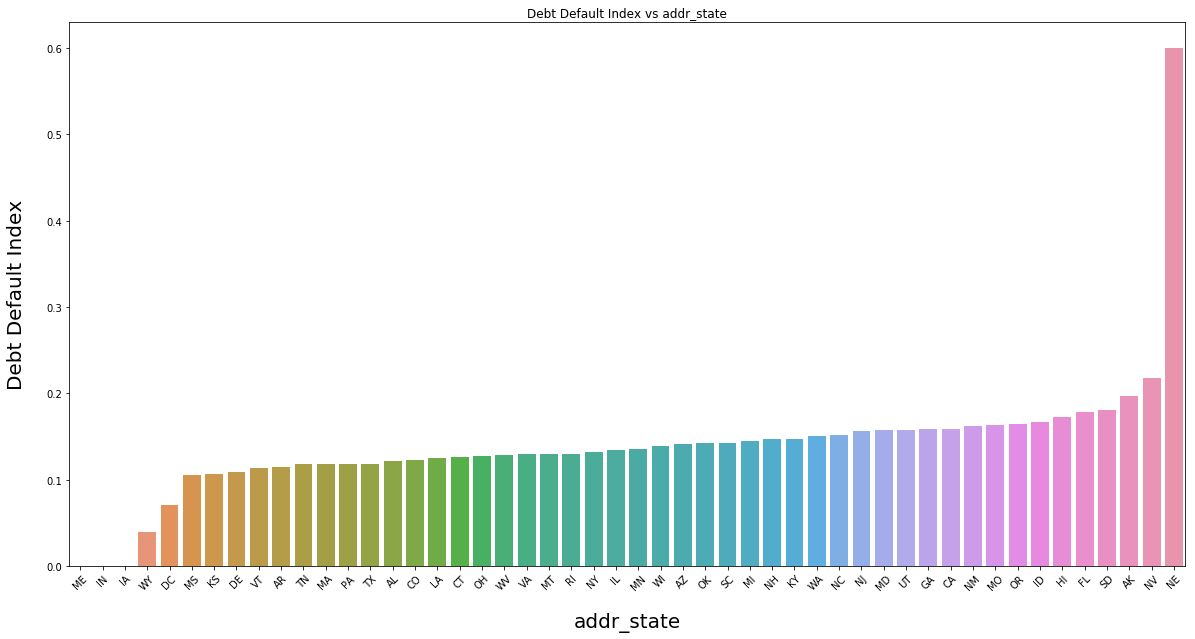

In [194]:
df2=debt_default_by_segment('addr_state').sort_values(by='percent_charged_off',ascending=True)
plot_for_seg_univariate('addr_state',df2)

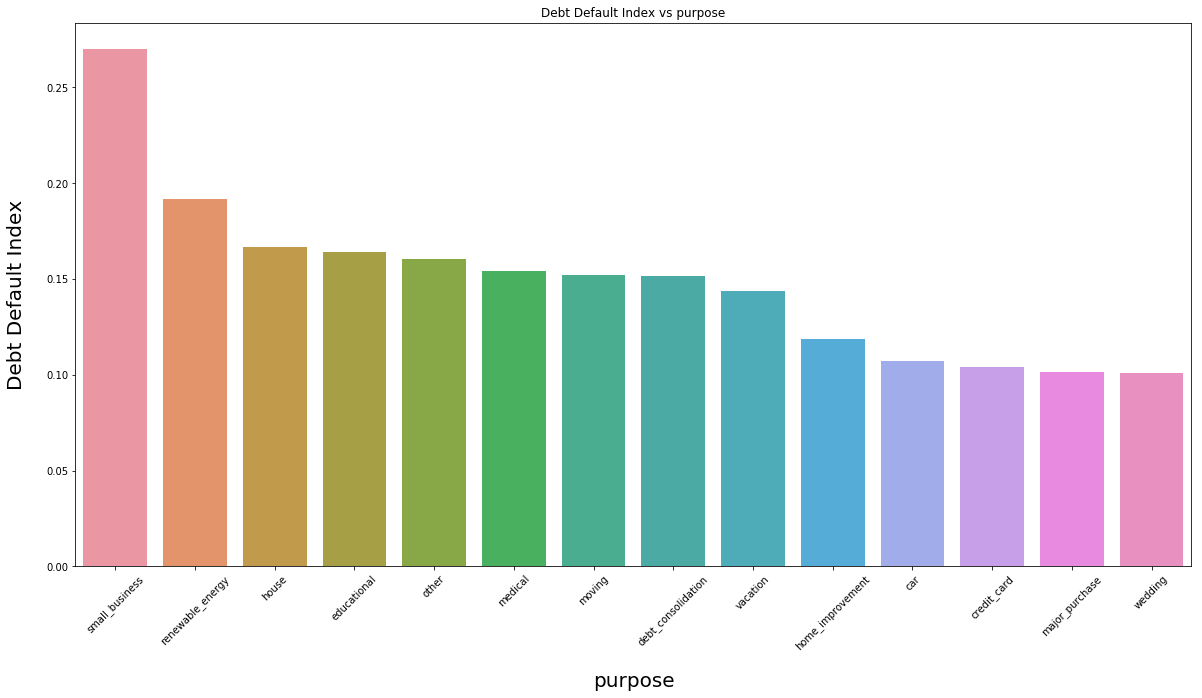

In [195]:
df2=debt_default_by_segment('purpose').sort_values(by='percent_charged_off',ascending=False)
plot_for_seg_univariate('purpose',df2)

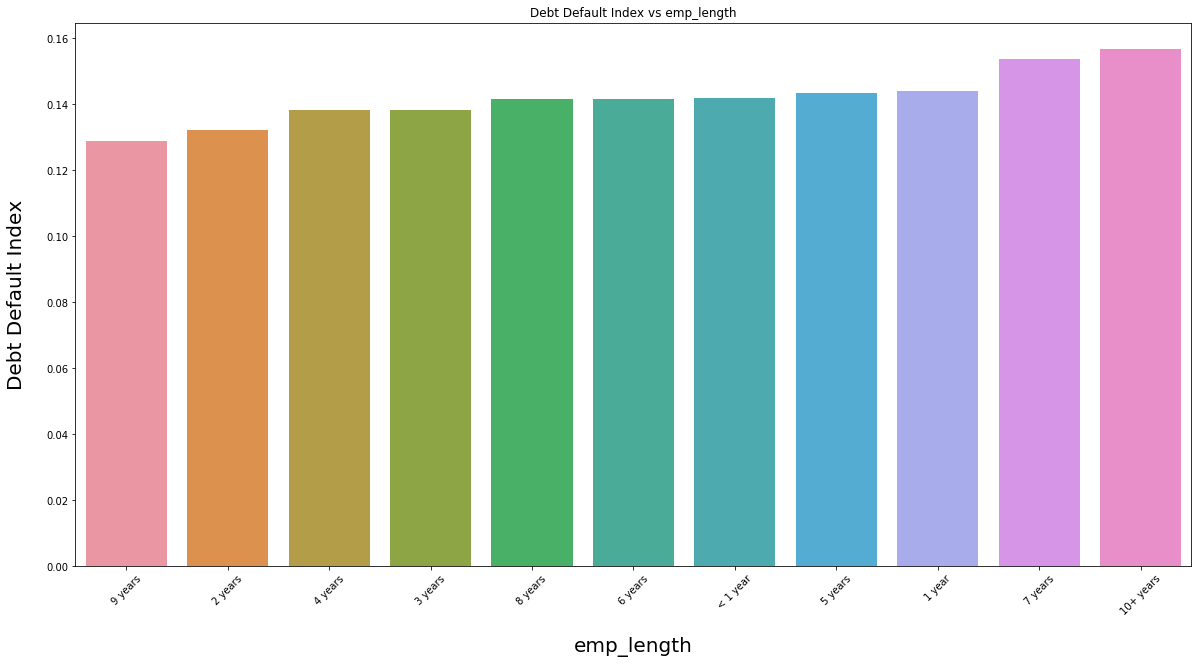

In [197]:
df2=debt_default_by_segment('emp_length').sort_values(by='percent_charged_off',ascending=True)
plot_for_seg_univariate('emp_length',df2)

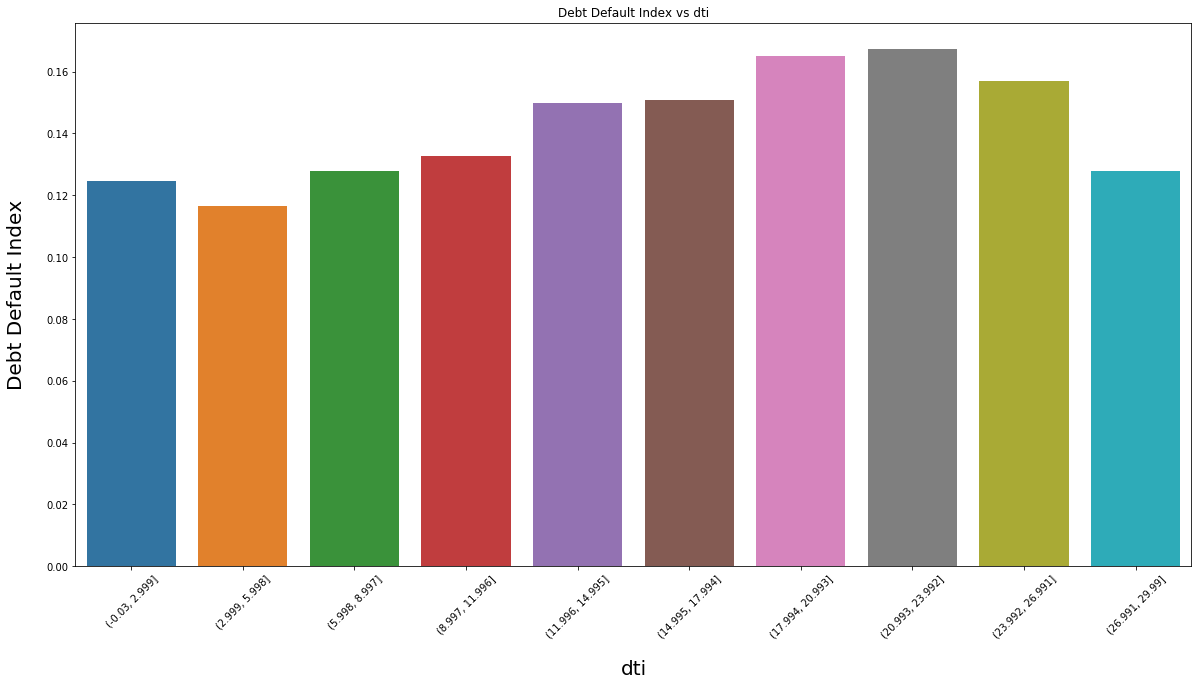

In [105]:
df2=debt_default_by_segment_numbins('dti','dti_group',10).sort_values(by='percent_charged_off',ascending=True)
plot_for_seg_univariate('dti',df2)

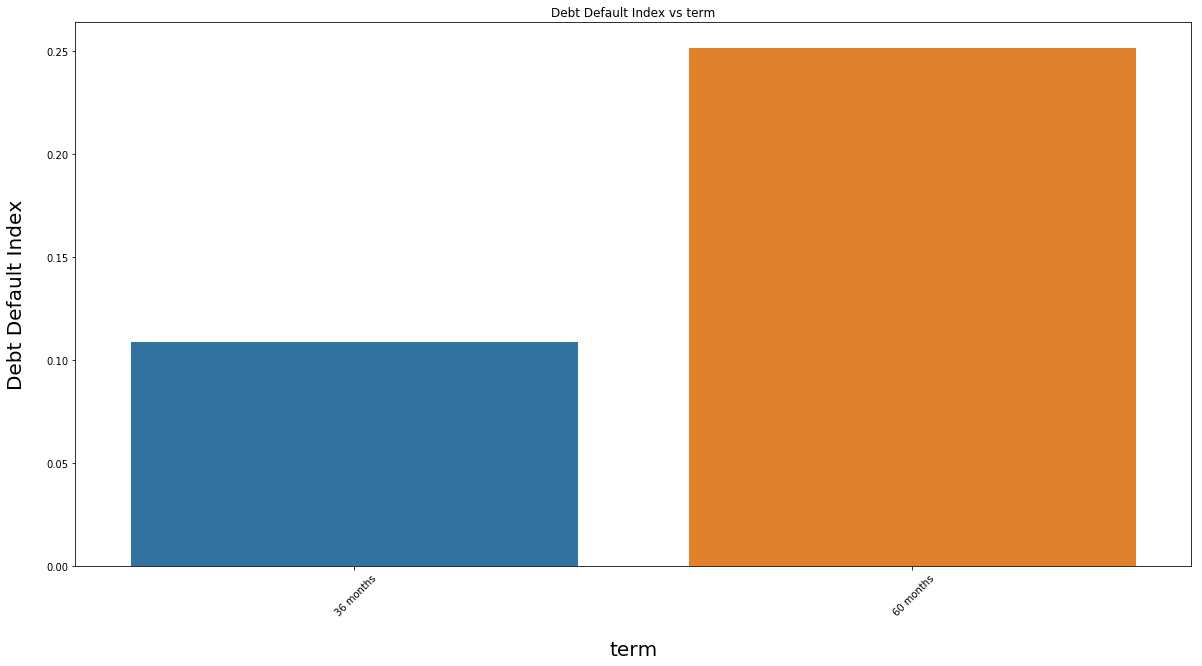

In [53]:
df2=debt_default_by_segment('term').sort_values(by='percent_charged_off',ascending=True)
plot_for_seg_univariate('term',df2)

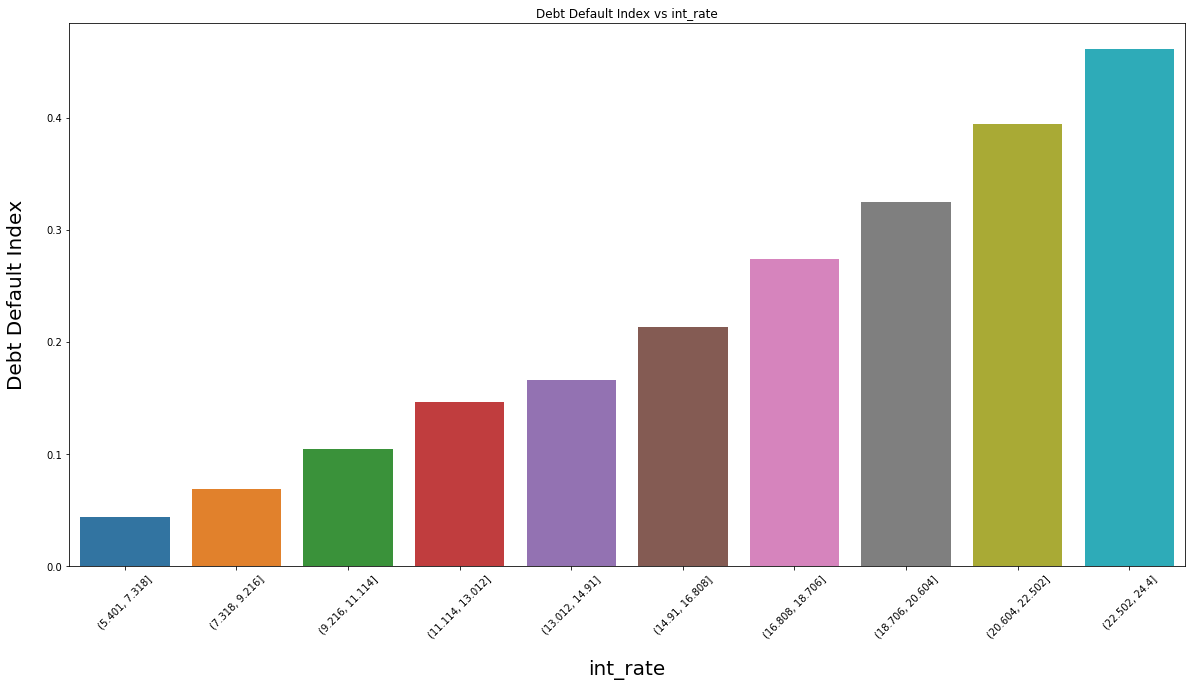

In [110]:
df2=debt_default_by_segment_numbins('int_rate','int_group',10).sort_values(by='percent_charged_off',ascending=True)
plot_for_seg_univariate('int_rate',df2)

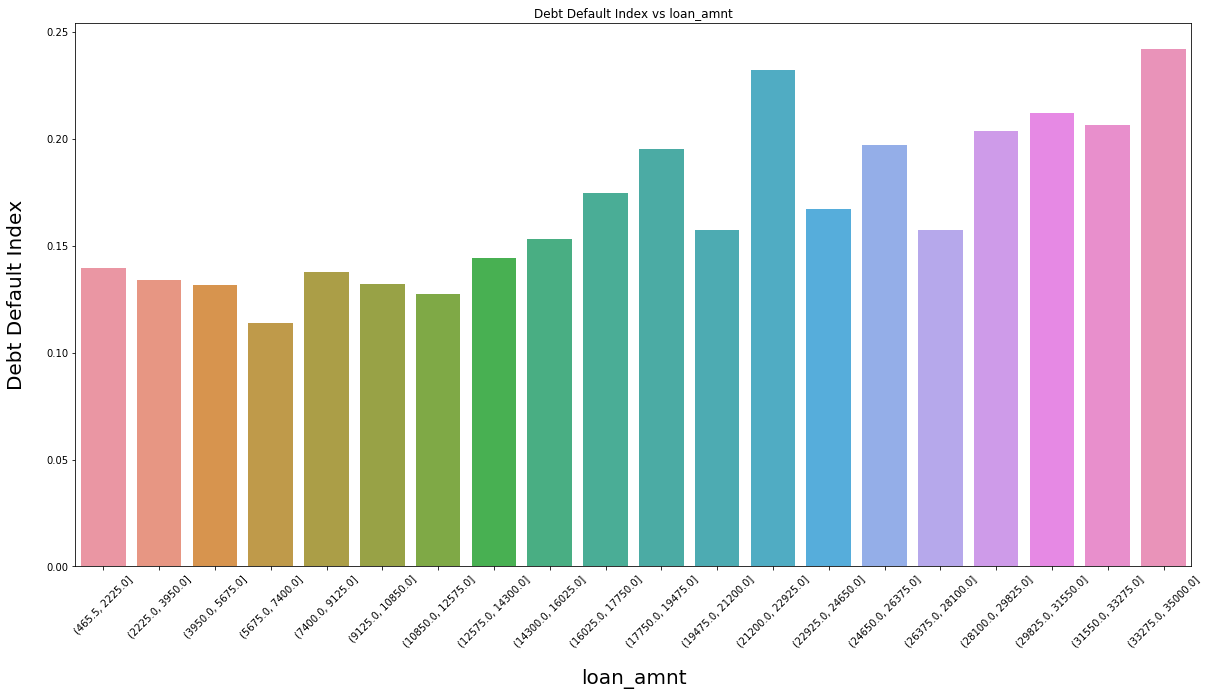

In [115]:
df2=debt_default_by_segment_numbins('loan_amnt','loan_amt_group',20).sort_values(by='percent_charged_off',ascending=True)
plot_for_seg_univariate('loan_amnt',df2)

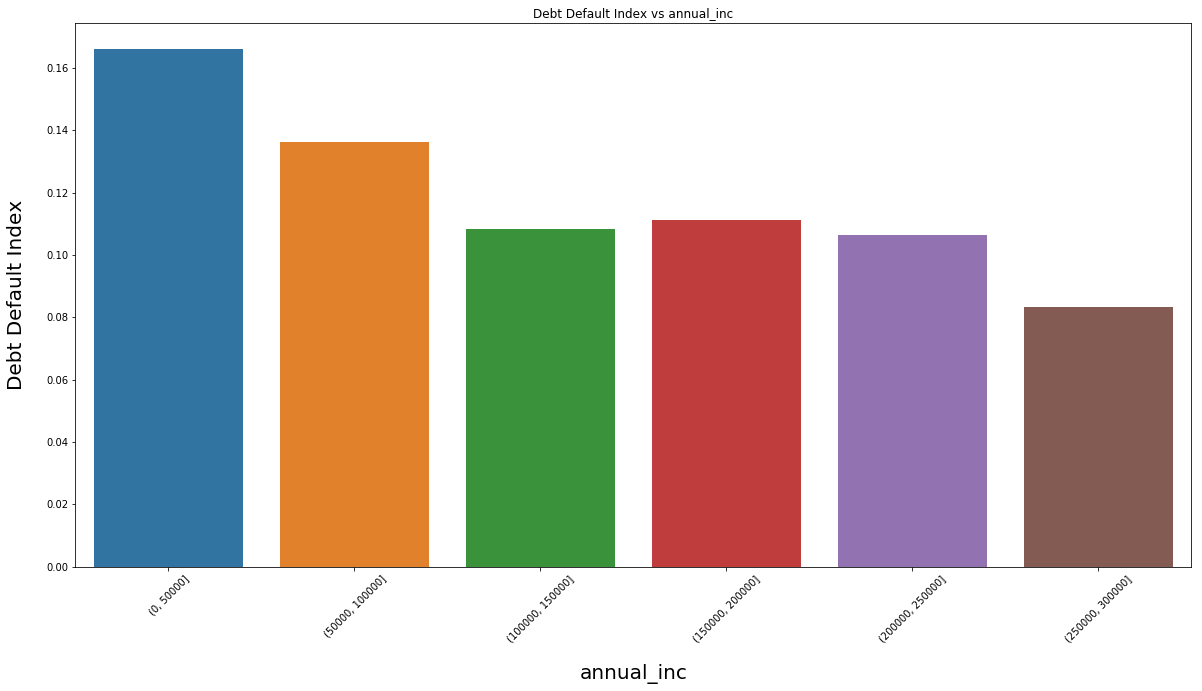

In [124]:
income_group_ordinal=list(np.arange(0,350000,50000))
df2=debt_default_by_segment_numbins('annual_inc','income_group',income_group_ordinal).sort_values(by='percent_charged_off',ascending=True)
plot_for_seg_univariate('annual_inc',df2)

In [57]:
#Bi-variate analysis on the continuous variables part of the data
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,charged_off,fully_paid
count,3.754400e+04,3.754400e+04,37544.000000,37544.000000,37544.000000,37544.000000,3.754400e+04,37544.000000,37544.000000,37544.000000,37544.000000,37544.000000,37544.000000,37544.000000,37544.000000
mean,6.743002e+05,8.394864e+05,11119.329986,10853.560489,10280.495739,324.654219,6.940708e+04,13.284186,0.147107,0.872390,9.298476,0.053724,22.083875,0.143805,0.856195
std,2.098464e+05,2.655176e+05,7354.098954,7096.316776,7034.124211,208.896924,6.467698e+04,6.660551,0.493479,1.071003,4.396229,0.234622,11.416494,0.350896,0.350896
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,16.000000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000
25%,5.091155e+05,6.564908e+05,5500.000000,5400.000000,5000.000000,167.000000,4.100000e+04,8.160000,0.000000,0.000000,6.000000,0.000000,13.000000,0.000000,1.000000
50%,6.534655e+05,8.352880e+05,10000.000000,9600.000000,8850.000000,280.000000,6.000000e+04,13.380000,0.000000,1.000000,9.000000,0.000000,20.000000,0.000000,1.000000
75%,8.269000e+05,1.034972e+06,15000.000000,15000.000000,14075.000000,429.000000,8.300000e+04,18.550000,0.000000,1.000000,12.000000,0.000000,29.000000,0.000000,1.000000
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.000000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,90.000000,1.000000,1.000000


In [58]:
#EDADF_sub = loan_df._get_numeric_data()
#sns.heatmap(EDADF_sub, annot=True,
#          xticklabels=EDADF_sub.columns.values,
#          yticklabels=EDADF_sub.columns.values)
#plt.show()

In [59]:
#Bi-variate analysis on the continous variables (loan_amount vs interest rate)
#fully_paid_df.plot(kind='scatter', y='loan_amnt', x='funded_amnt', ylim=((0, 50000)), xlim=((0, 50000)))
#plt.show()
#default_paid_df.plot(kind='scatter', y='loan_amnt', x='funded_amnt', ylim=((0, 50000)), xlim=((0, 50000)))
#plt.show()

In [60]:
#Bi-variate analysis on the continous variables (loan_amount vs interest rate)
#fully_paid_df.plot(kind='scatter', x='loan_amnt', y='annual_inc', xlim=((0, 50000)), ylim=((0, 500000)))
#plt.show()
#default_paid_df.plot(kind='scatter', x='loan_amnt', y='annual_inc', xlim=((0, 50000)), ylim=((0, 500000)))
#plt.show()

In [61]:
#Bi-variate analysis on the continous variables (loan_amount vs interest rate)
#fully_paid_df.plot(kind='bar', x='total_acc', y='inq_last_6mths', ylim=((1, 10)), xlim=((0, 10)))
#plt.show()
#default_paid_df.plot(kind='bar', x='total_acc', y='inq_last_6mths', ylim=((1, 10)), xlim=((0, 10)))
#plt.show()

In [62]:
#Bi-variate analysis on the continous variables (loan_amount vs interest rate)
#fully_paid_df.plot(kind='scatter', x='total_acc',y='delinq_2yrs', ylim=((1, 40)), xlim=((0, 40)))
#plt.show()
#default_paid_df.plot(kind='scatter', x='total_acc', y='delinq_2yrs', ylim=((1, 40)), xlim=((0, 40)))
#plt.show()

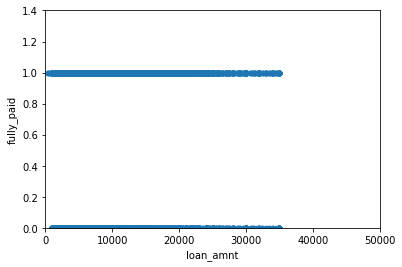

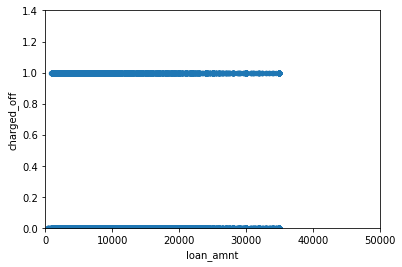

In [70]:
#Bi-variate analysis on the continous variables (delinq_2yrs vs fully paid )
loan_df.plot(kind='scatter', y='fully_paid',x='loan_amnt', xlim=((0, 50000)), ylim=((0, 1.4)))
plt.show()
loan_df.plot(kind='scatter', y='charged_off', x='loan_amnt', xlim=((0, 50000)), ylim=((0, 1.4)))
plt.show()

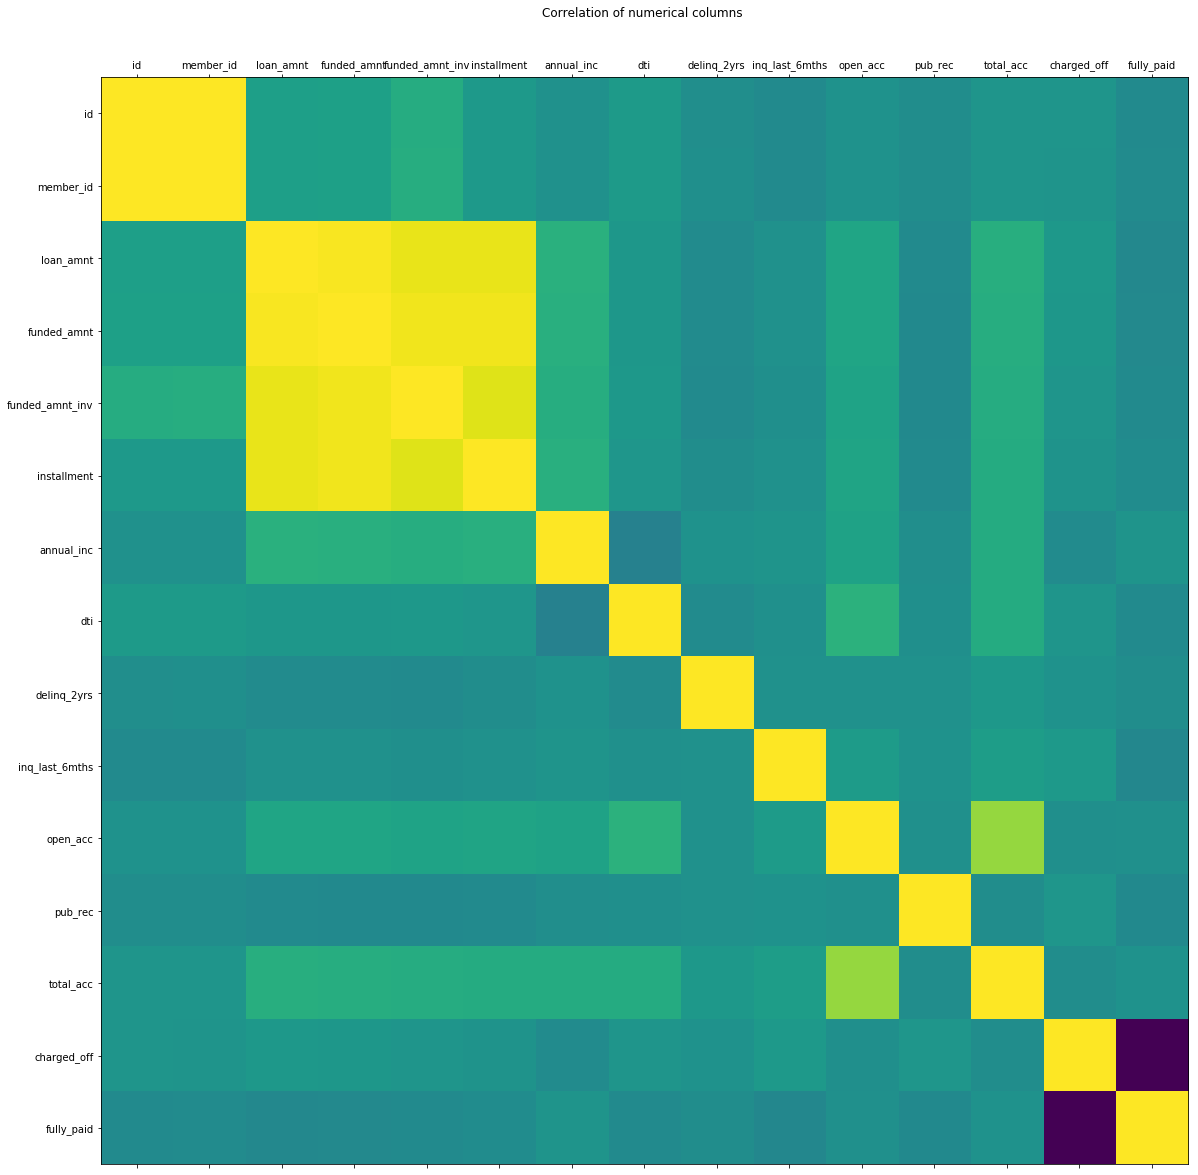

In [86]:
corr = loan_df._get_numeric_data().corr()
fig, ax = plt.subplots(figsize=(20, 20))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
ax.legend()
plt.title('Correlation of numerical columns ')
plt.show()

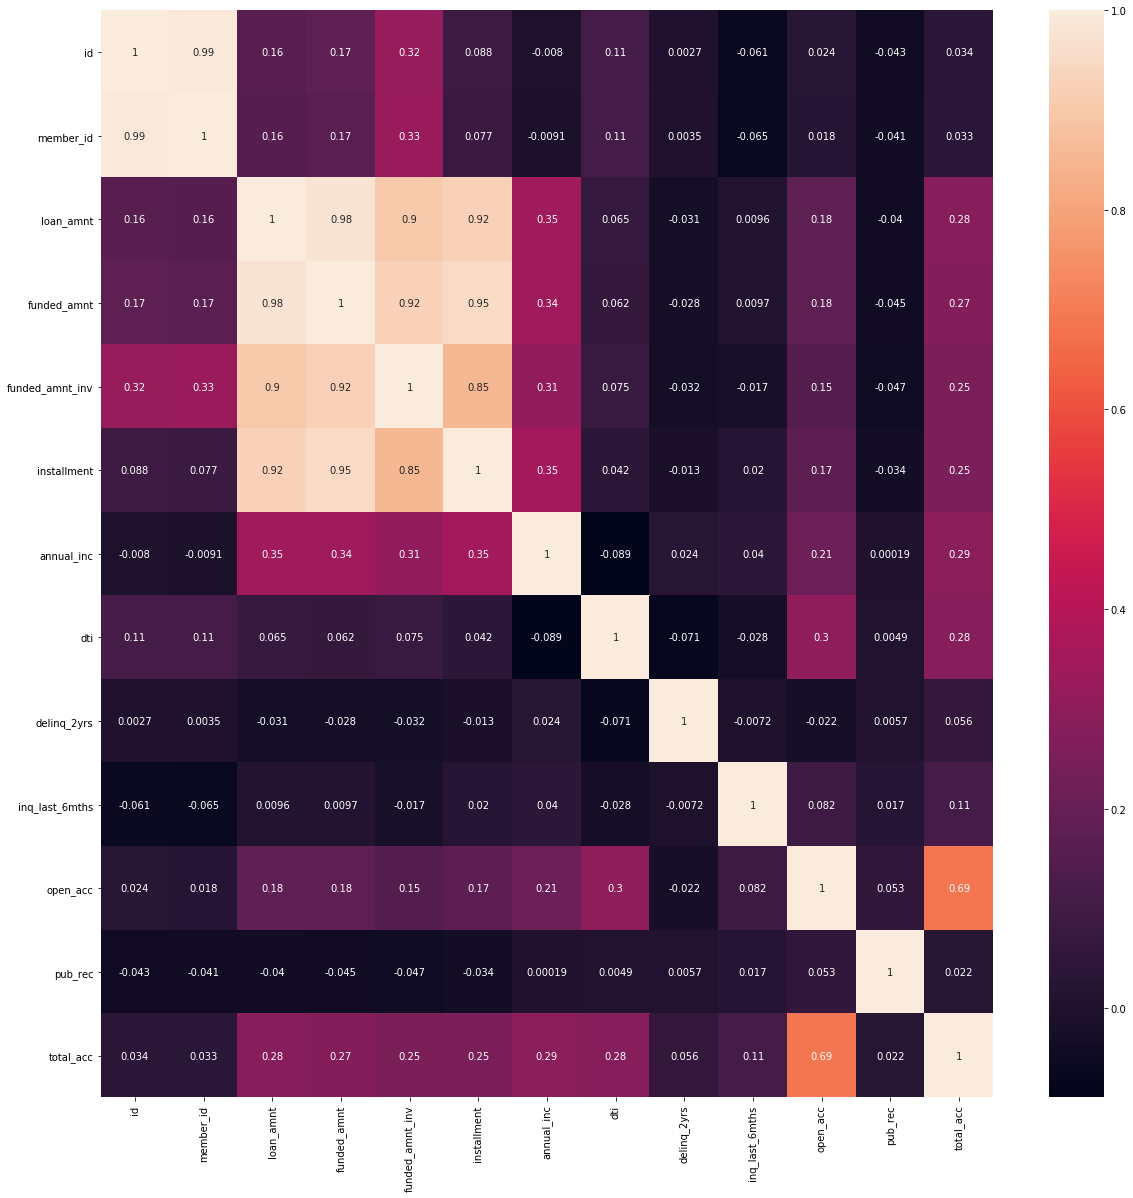

In [90]:
corr_df = default_paid_df.corr(method='pearson')
plt.subplots(figsize=(20, 20))
sns.heatmap(corr_df, annot=True,
          xticklabels=corr_df.columns.values,
          yticklabels=corr_df.columns.values)
plt.show()

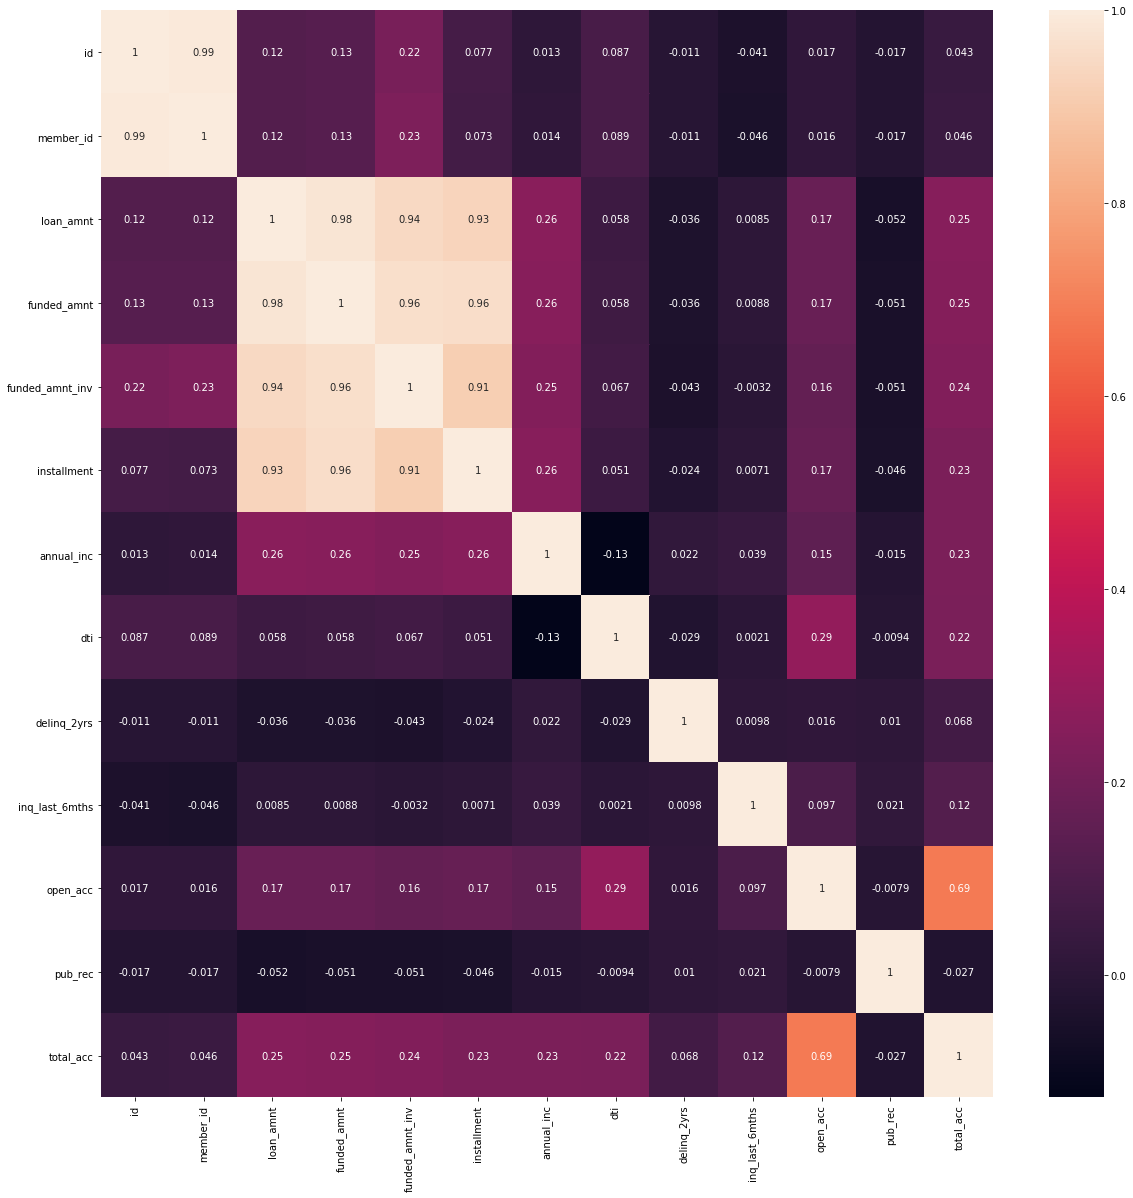

In [91]:
corr_df = fully_paid_df.corr(method='pearson')
plt.subplots(figsize=(20, 20))
sns.heatmap(corr_df, annot=True,
          xticklabels=corr_df.columns.values,
          yticklabels=corr_df.columns.values)
plt.show()